# Laboratorio 8 - Deep Learning

Importación de librerías necesarias

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import sklearn

Carga de datos

In [44]:
data = pd.read_csv("train.csv")
print(data.shape)
print(data.info())
print(data.head())

(913000, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int64 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 27.9+ MB
None
         date  store  item  sales
0  2013-01-01      1     1     13
1  2013-01-02      1     1     11
2  2013-01-03      1     1     14
3  2013-01-04      1     1     13
4  2013-01-05      1     1     10


## Preparación de datos

In [45]:
data.isnull().sum()

date     0
store    0
item     0
sales    0
dtype: int64

In [46]:
data.describe()

,store,item,sales
count,913000.000000,913000.000000,913000.000000
mean,5.500000,25.500000,52.250287
std,2.872283,14.430878,28.801144
min,1.000000,1.000000,0.000000
25%,3.000000,13.000000,30.000000
50%,5.500000,25.500000,47.000000
75%,8.000000,38.000000,70.000000
max,10.000000,50.000000,231.000000


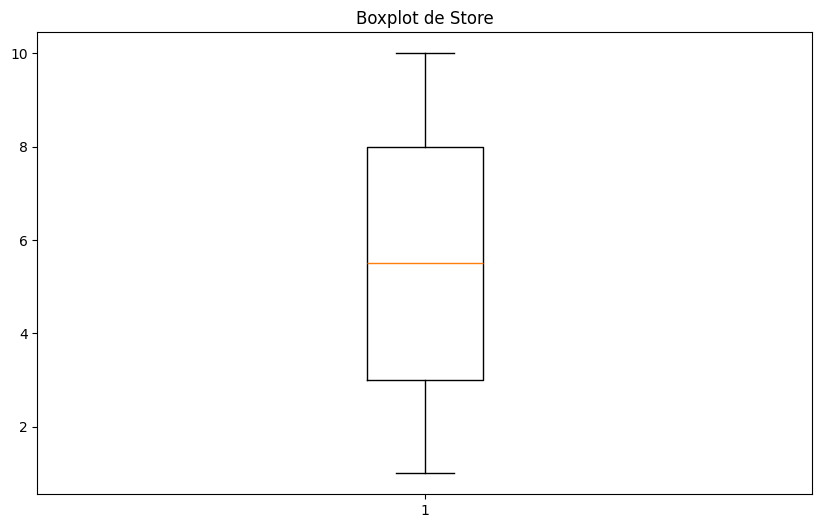

In [47]:
plt.figure(figsize=(10,6))
plt.boxplot(data['store'])
plt.title('Boxplot de Store')
plt.show()


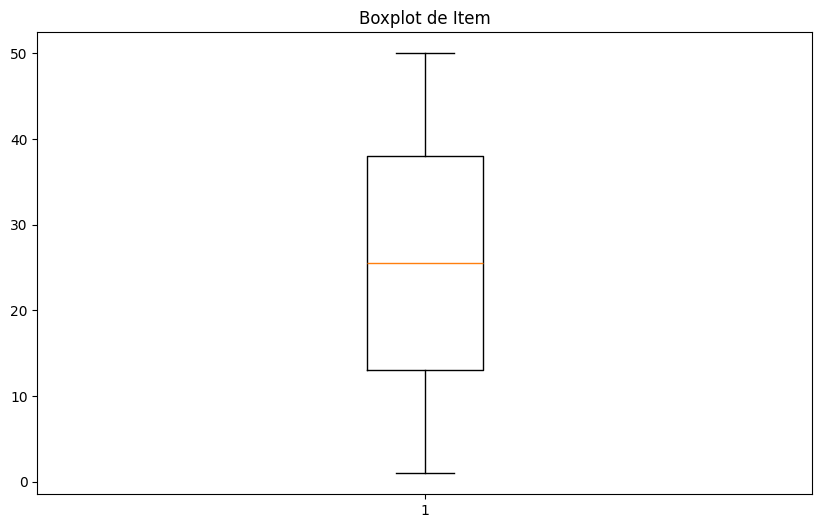

In [48]:
plt.figure(figsize=(10,6))
plt.boxplot(data['item'])
plt.title('Boxplot de Item')
plt.show()


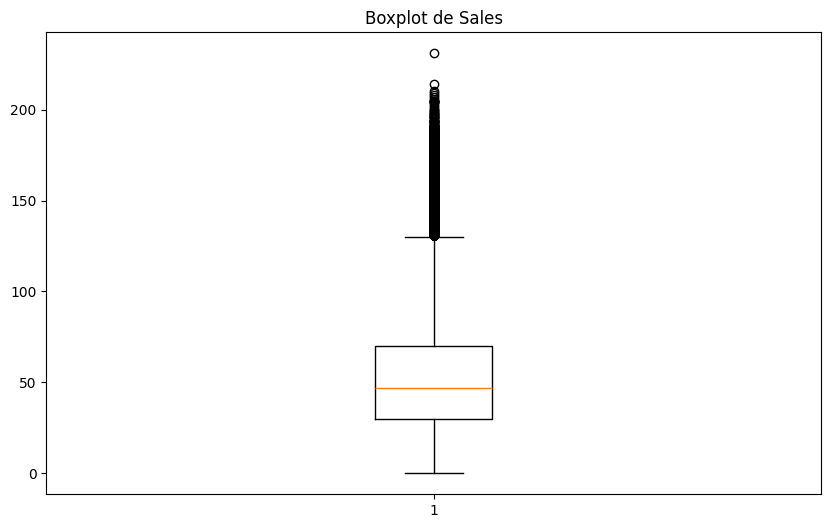

In [49]:
plt.figure(figsize=(10,6))
plt.boxplot(data['sales'])
plt.title('Boxplot de Sales')
plt.show()


In [67]:
# Manejo de valores atípico
def handleAtipicals(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    min = Q1 - 0.5 * IQR
    max = Q3 + 0.5 * IQR
    df[column] = np.where(df[column] > max, max, df[column])
    df[column] = np.where(df[column] < min, min, df[column])
    return df

In [68]:
# Se manejan los valores atípicos de la columna SALES, 
# puesto que tiene una desviación estándar bastante alta, 
# así como una diferencia considerable entre los valores
# dentro de los cuartiles y los valores máximos y mínimos.
data_clean = handleAtipicals(data,'sales')

               store           item          sales
count  913000.000000  913000.000000  913000.000000
mean        5.500000      25.500000      50.082940
std         2.872283      14.430878      24.171013
min         1.000000       1.000000      10.000000
25%         3.000000      13.000000      30.000000
50%         5.500000      25.500000      47.000000
75%         8.000000      38.000000      70.000000
max        10.000000      50.000000      90.000000


In [53]:
# Se aplica de nuevo la descripción para evaluar limpieza
data_clean.describe()

,store,item,sales
count,913000.000000,913000.000000,913000.000000
mean,5.500000,25.500000,52.067088
std,2.872283,14.430878,28.223040
min,1.000000,1.000000,0.000000
25%,3.000000,13.000000,30.000000
50%,5.500000,25.500000,47.000000
75%,8.000000,38.000000,70.000000
max,10.000000,50.000000,130.000000
